# Polynomial Regression

In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [6]:
### Creating Training and Test Datasets

msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]
test = cdf[~msk]

## Polynomial regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# train_x

In [9]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

fit_transform takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.   

$$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$$

 
It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  𝑥  with  𝑥1 ,  𝑥21  with  𝑥2 , and so on. Then the degree 2 equation would be turn into:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$
 
Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems.

so we can use LinearRegression() function to solve it:

In [10]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [11]:
train_y_reg = reg.fit(train_x_poly, train_y)

In [14]:
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

print(reg.coef_[0][1])

Coefficients: [[ 0.         49.50565799 -1.40318109]]
Intercept: [108.12644989]
49.505657989658836


Text(0, 0.5, 'CO2 Emissions')

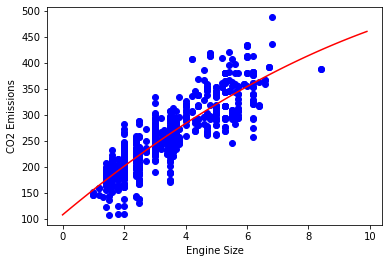

In [34]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = reg.intercept_[0] + reg.coef_[0][1]*xx + reg.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

## Evaluation

In [35]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_hat = reg.predict(test_x_poly)

print("Mean absolute error: %.3f" % np.mean(np.absolute( test_y_hat - test_y)))
print("Mean Squared Error (MSE): %.3f " % np.mean((test_y_hat - test_y)**2))
print("R2 Score %.3f " % r2_score(test_y, test_y_hat))

Mean absolute error: 22.404
Mean Squared Error (MSE): 807.753 
R2 Score 0.781 


### Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [22]:
cube = PolynomialFeatures(degree=3)

train_x_cube = cube.fit_transform(train_x)
train_x_cube

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [27]:
regcube = linear_model.LinearRegression()

train_y_hat = regcube.fit(train_x_cube, train_y)

print("Coefficient: ", regcube.coef_)
print("Intercept: ", regcube.intercept_)

Coefficient:  [[ 0.         30.3655597   3.86078096 -0.43508738]]
Intercept:  [128.46156048]


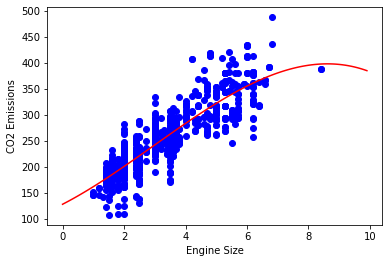

In [31]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = regcube.intercept_[0] + regcube.coef_[0][1]*xx + regcube.coef_[0][2]*(xx**2) + regcube.coef_[0][3]*(xx**3)
plt.plot(xx, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

## Evaluation

In [33]:
from sklearn.metrics import r2_score

test_x_cube = cube.fit_transform(test_x)
test_y_hat = regcube.predict(test_x_cube)

print("Mean Absolute Error: %.3f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Mean Squared Error: %.3f" % np.mean((test_y_hat - test_y)**2))
print("R2 Score: %.3f" % r2_score(test_y_hat, test_y))

Mean Absolute Error: 22.326
Mean Squared Error: 802.561
R2 Score: 0.724
